# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса по подбору недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры, что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# Импортируем библиотеки, которые нам пригодятся.
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 40)  # максимум колонок

In [2]:
# открываем датасет
data = pd.read_csv(*)

In [3]:
# Функция для предварительного ознакомления с данными. 

def hello_data(data):
    
    ''' Выводит первые строки, 
                info, 
                уникальные значения
                и пропуски, если они есть '''
    
    columns = data.columns 
    display(data.head(10))
    display(data.info())
    lost_values = data.duplicated().sum()
   
    print(
        f'Явных дубликатов в данных: {lost_values}. Это {lost_values / len(data) * 100:.2f}% от всех значений.'
         )
    print()
        
    for column in columns: # для каждой колонки
        try:
            unique_value = (len(data[column].unique())) # считаем уникальные значения 
        except AssertionError:
            pass
        
        if data[column].isna().sum() != 0: # если в колонке есть пропуски
            print( f'Уникальных значений в колонке {column} - {unique_value}') #выводим количество уникальных значений
            persent = (data[column].isna().sum() / len(data[column]) * 100) # считаем сколько это в процентах и округляем методом "round"
            print('Пропущенных строк в колонке {} - {:.1f} %'.format(column, persent))
            print("_"*20)
        else: print( f'Уникальных значений в колонке {column} - {unique_value}') # если пропусков не нашли, то выводим количество уникальных значений  
     
hello_data(data)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

Явных дубликатов в данных: 0. Это 0.00% от всех значений.

Уникальных значений в колонке total_images - 38
Уникальных значений в колонке last_price - 2978
Уникальных значений в колонке total_area - 2182
Уникальных значений в колонке first_day_exposition - 1491
Уникальных значений в колонке rooms - 17
Уникальных значений в колонке ceiling_height - 184
Пропущенных строк в колонке ceiling_height - 38.8 %
____________________
Уникальных значений в колонке floors_total - 37
Пропущенных строк в колонке floors_total - 0.4 %
____________________
Уникальных значений в колонке living_area - 1783
Пропущенных строк в колонке living_area - 8.0 %
____________________
Уникальных значений в колонке floor - 33
Уникальных значений в колонке is_apartment - 3
Пропущенных строк в колонке is_apartment - 88.3 %
____________________
Уникальных значений в колонке studio - 2
Уникальных значений в колонке open_plan - 2
Уникальных значений в колонке kitchen_area - 972
Пропущенных строк в колонке kitchen_area - 9.

### Вывод

Для удобства дальнейшей работы перечислим колонки и их значения:
    
- total_images - количество фото в публикации
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах
- first_day_exposition - дата публикации
- rooms — число комнат
- ceiling_height — высота потолков 
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах
- floor — этаж
- is_apartment — апартаменты
- studio — квартира-студия
- open_plan — свободная планировка
- kitchen_area — площадь кухни в квадратных метрах
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах
- cityCenters_nearest — расстояние до центра города 
- ponds_around3000 — число водоёмов в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка
- parks_around3000 — число парков в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма
- days_exposition — сколько дней было размещено объявление


Всего наблюдений 23699. В 14 из 22 колонок есть существенное количество не заполненных значений.Больше всего пропущенных значений в колонке "is_apartment" - 88%. Необходимо будет изучить содержание этих колонок и, по возможности, заполнить значения. Также есть проблема в типах значений. Большинство имеют тип float, хотя количество этажей в доме -"floors_total" или дней от публикации до снятия объявления -"days_exposition" удобнее изучать в целочисленном формате. Переменная "first_day_exposition" - дата публикации объявления имеет тип float, но должна быть типа datetime.

## Предобработка данных

Пройдемся по колонкам. Посмотрим соответствует ли тип содержанию и на наличие аномальных значений. При необходимости сразу внесем исправления.

У нас есть колонки в которых значения не могут быть дробными и есть колонки в которых это просто не нужно: 

- last_price,  float64 
- floors_total, float64
- balcony, float64
- days_exposition, float64


Для удобства работы приведем значения к целочисленным. Создадим список колонок для замены и с помощью метода astype() циклом заменим значения. Заодно заменим отсутствующие значения на 0, ими проще оперировать. 

Меняя значения на 0 исходим из того, что данные не исказятся. Отсутствующие значения для этих колонок и 0 по смыслу одинаковы. К примеру в случае с балконами и водоемами 0 означает отсутствие. Позже, где это будет целесообразно, нулевые значения можно будет заменить на более подходящее -медианное.

In [4]:
# создаем список колонок для замены
columns_change = ['last_price', 'floors_total', 'balcony', 'cityCenters_nearest','days_exposition']
# создаем цикл для замены, в котором для значений в каждой колонке пропущенные значения меняются на 0,
# затем меняется тип
for column in columns_change:
    data[column] = data[column].fillna(0)
    data[column] = data[column].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int32  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int32  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Расположение недвижимости

Изучим колонки, касающиеся расположения недвижимости. Начнем с названий.

In [5]:
# сортируем и смотрим уникальные значения названий населенных пунктов
data.sort_values('locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Названия не уникальны, есть неявные дубликаты,например, Мурино и поселок Мурино, ниже поправим. Есть и пропуски:

In [6]:
# считаем пропуски в названиях населенных пунктов
data['locality_name'].isna().sum()

49

Всего 49 значений из 23,7 тысяч. Поскольку заполнить эти значения на основе имеющихся данных не представляется возможным и использовать их для исследования не получится, то удалим эти строки.

In [7]:
# удаляем строки с NaN в названиях
data= data.dropna(subset=['locality_name'])
# проверяем что получилось удалить
data['locality_name'].isna().sum()

0

Напишем функцию для удаленния неявных дубликатов в названиях. Нужно убрать название территориального образования из Названия населенного пункта.

In [8]:
# составляем список неугодных нам слов:
bad_words = ['городской', 'посёлок', 'деревня', 'коттеджный', 
              'городского типа', 'станции', 'при железнодорожной', 
             'поселок', 'некоммерческое', 
             'садовое','товарищество', 'село','поселок','садоводческое']

# объявляем функцию
def good_name(column):
        
    for bad_word in bad_words:
        
        column = column.replace(bad_word, '').strip() # для значения в колонке меняем лишние слова на Ничто и трем лишние пробелы
    return column

data['good_locality_name'] = data['locality_name'].apply(good_name) # создаем новую колонку с названиями

# сортируем и смотрим уникальные значения названий населенных пунктов
data.sort_values('good_locality_name')['good_locality_name'].unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильи

Остала пара наименований, которые выглядят не очень('имени Морозова','имени Свердлова'), но скорее всего это редкие наименования и на дальнейшем исследовании не скажуться. Предлагаю пока не трогать.

Теперь посмотрим на расстояние до центра населенного пункта, аропорта, парков и водоемов. Ранее в этих колонках отсутствующие значения уже были заменены на 0. Посмотрим cколько у нас нулей по колонке "cityCenters_nearest"

In [9]:
# делаем срез с нулевыми значенями для расстояния до центра населенного пункта
data.query('cityCenters_nearest == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,0,NaN,NaN,NaN,NaN,55,Янино-1
8,20,2900000,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,0,NaN,NaN,NaN,NaN,189,Мурино
12,10,3890000,54.00,2016-06-30T00:00:00,2,NaN,5,30.00,5,NaN,False,False,9.00,0,Сертолово,NaN,0,NaN,NaN,NaN,NaN,90,Сертолово
22,20,5000000,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,NaN,False,False,11.00,2,деревня Кудрово,NaN,0,NaN,NaN,NaN,NaN,60,Кудрово
30,12,2200000,32.80,2018-02-19T00:00:00,1,NaN,9,NaN,2,NaN,False,False,NaN,0,Коммунар,NaN,0,NaN,NaN,NaN,NaN,63,Коммунар
37,10,1990000,45.80,2017-10-28T00:00:00,2,2.50,5,NaN,1,NaN,False,False,NaN,0,поселок городского типа Красный Бор,NaN,0,NaN,NaN,NaN,NaN,196,Красный Бор
38,10,3150000,40.00,2018-03-29T00:00:00,1,2.75,18,16.30,9,NaN,False,False,11.60,0,посёлок Мурино,NaN,0,NaN,NaN,NaN,NaN,103,Мурино
47,17,3600000,56.10,2018-10-18T00:00:00,3,NaN,4,42.50,3,NaN,False,False,5.70,1,Гатчина,NaN,0,NaN,NaN,NaN,NaN,179,Гатчина
60,3,2740000,35.00,2018-01-01T00:00:00,1,NaN,12,NaN,8,NaN,False,False,NaN,0,посёлок Мурино,NaN,0,NaN,NaN,NaN,NaN,11,Мурино
62,0,4800000,78.60,2017-09-17T00:00:00,3,2.80,9,48.80,5,NaN,False,False,11.90,2,Сертолово,NaN,0,NaN,NaN,NaN,NaN,5,Сертолово


Видим, что помимо незаполненных значений для центра, также отсутствуют значения для аропорта, парков и водоемов. Зная, что данные собраны за несколько лет и расстояния получены автоматически, на основе картографических данных, можно предположить, что функция сбора этих данных появилась позже публикации объявления. Второй вариант- это ошибки при сохранении данных. Не плохо было бы расспросить об этом разработчиков или тех, кто выгружал данные.

Заменять отсутствующие значения до центра нет никакого смысла. Для маленьких населенных пунктов это не особо важно, а для больших как Санкт- петербург даже вредно. Придется оставить как есть.

Приведем даты публикации в "first_day_exposition".Заменим с типа float на подходящий формат datetime:

In [10]:
#замена типа на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Этажность и  площади

Рассмотрим данные о характеристиках недвижимости:
    
- total_area — площадь квартиры в квадратных метрах
- rooms — число комнат
- ceiling_height — высота потолков
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах
- floor — этаж
- is_apartment — апартаменты
- studio — квартира-студия
- open_plan — свободная планировка
- kitchen_area — площадь кухни в квадратных метрах

In [11]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Минимальное значение общей площади 12 метров- приемлемо, а вот максимальное для квартиры в 900 маловероятно. Запомним, но делать пока ничего не будем.
Смотрим на жилую площадь.

In [12]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [13]:
data['living_area'].isnull().sum()

1898

Жилая площадь в основном находится в диапазоне от 18 до 42 м2. Есть также часть объявлений, где жилая площадь не указана. Заменим пропущенные значения медианами, учитывая общую площадь и количество комнат в квартире.

In [14]:
# Добавляем столбец, в котором будут храниться медианные значения.

data['median_living_area'] = (data.groupby(['total_area', 'rooms']) # группируем по общей площади и количеству комнат
                                  ['living_area'].transform('median')) # и считаем медианнные площади

# Заполняем пропущенные значения медианными.
data['living_area'] = data['living_area'].fillna(data['median_living_area'])

# смотрим что получилось
data.query('living_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,median_living_area


In [15]:
# Оставшиеся 211 строк заполним медианой расчитанной только по количеству комнат.

group_by_room = (data.groupby(['rooms'])['living_area'].transform('median')) 
# Заполняем пропущенные значения.
data['living_area'] = data['living_area'].fillna(group_by_room)
# смотрим что получилось
data['living_area'].isnull().sum()

0

In [16]:
# смотрим на количество комнат
data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Нашли 197 объявлений с квартирами без комнат. Посмотрим на них подробнее:

In [17]:
# Запишем в "zero_rooms" срез с нулевым количеством комнат
zero_rooms = data.query('rooms == 0')
zero_rooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 144 to 23637
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          197 non-null    int64         
 1   last_price            197 non-null    int32         
 2   total_area            197 non-null    float64       
 3   first_day_exposition  197 non-null    datetime64[ns]
 4   rooms                 197 non-null    int64         
 5   ceiling_height        82 non-null     float64       
 6   floors_total          197 non-null    int32         
 7   living_area           197 non-null    float64       
 8   floor                 197 non-null    int64         
 9   is_apartment          6 non-null      object        
 10  studio                197 non-null    bool          
 11  open_plan             197 non-null    bool          
 12  kitchen_area          0 non-null      float64       
 13  balcony         

Видим очень большое количество пропущенных значений в разных колонках, а колонка "kitchen_area" вообще пустая. Посмотрим на медианную площадь таких квартир:

In [18]:
zero_rooms['total_area'].median()

26.05

Учитывая небольшую площадь этих квартир делаем вывод, что это квартиры-студии, где нет отдельных кухонь. Можно оставить значение 0 комнат, и пустые значения в "kitchen_area".

Переходим к высоте потолков - "ceiling_height".

In [19]:
# смотрим на высоту потолков с сортировкой по возрастанию
data.sort_values('ceiling_height')['ceiling_height'].unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Нашли выбивающиеся значения. Высота потолков в 1 метр и 100 метров явно ошибочные. Впрочем, потолки ниже 2,5 и выше 5 метров тоже выглядят неправдоподобными. Но, оставим пока как есть. Заменим только отсутствующие значения на медианные по количеству комнат.

In [20]:
# Добавляем столбец, в котором будут храниться медианные значения.

data['median_ceiling_height'] = (data.groupby(['rooms']) # группируем по количеству комнат
                                  ['ceiling_height'].transform('median')) # и считаем медианнные высоты

# Заполняем пропущенные значения медианными.
data['ceiling_height'] = data['ceiling_height'].fillna(data['median_ceiling_height'])
# смотрим что получилось
data.query('ceiling_height == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,median_living_area,median_ceiling_height


Осталось одно объявление, в котором площадь и количество комнат уникальны и высоту потолков заменить нечем.

Теперь займемся количеством этажей в доме.

In [21]:
# смотрим на общее количество этаей в доме
data.sort_values('floors_total')['floors_total'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36,
       37, 52, 60])

Есть нулевые значения, посмотрим на таблицу.

In [22]:
data.query('floors_total == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,median_living_area,median_ceiling_height
186,12,11640000,65.2,2018-10-02,2,2.60,0,30.80,4,NaN,False,False,12.00,0,Санкт-Петербург,39197.0,12373,1.0,123.0,0.0,NaN,49,Санкт-Петербург,32.80,2.60
237,4,2438033,28.1,2016-11-23,1,2.64,0,20.75,1,NaN,False,False,NaN,0,Санкт-Петербург,22041.0,17369,0.0,NaN,1.0,374.0,251,Санкт-Петербург,18.00,2.64
457,4,9788348,70.8,2015-08-01,2,2.60,0,38.40,12,NaN,False,False,10.63,0,Санкт-Петербург,37364.0,8322,2.0,309.0,2.0,706.0,727,Санкт-Петербург,35.40,2.60
671,4,6051191,93.6,2017-04-06,3,2.65,0,47.10,8,NaN,False,False,16.80,0,Санкт-Петербург,22041.0,17369,0.0,NaN,1.0,374.0,123,Санкт-Петербург,50.60,2.65
1757,5,3600000,39.0,2017-04-22,1,2.64,0,18.00,9,NaN,False,False,NaN,0,Санкт-Петербург,22735.0,11618,1.0,835.0,1.0,652.0,77,Санкт-Петербург,18.00,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.80,0,32.75,3,NaN,False,False,NaN,0,Санкт-Петербург,51340.0,15363,0.0,NaN,1.0,853.0,512,Санкт-Петербург,32.75,2.60
22656,4,4574160,64.5,2017-04-02,2,2.60,0,31.70,20,NaN,False,False,14.40,0,Санкт-Петербург,22041.0,17369,0.0,NaN,1.0,374.0,127,Санкт-Петербург,34.50,2.60
22808,0,14569263,110.4,2016-11-20,3,2.65,0,45.38,6,NaN,False,False,23.42,0,Санкт-Петербург,19095.0,4529,0.0,NaN,0.0,NaN,260,Санкт-Петербург,45.38,2.65
23590,0,21187872,123.3,2017-04-25,3,2.65,0,50.40,18,NaN,False,False,23.60,0,Санкт-Петербург,19095.0,4529,0.0,NaN,0.0,NaN,104,Санкт-Петербург,50.40,2.65


Общее количество этажей в доме не указано в 85 случаях. Не много, но и менять на среднее - не угадаешь. Среди этих объявлений есть квартиры и на 1 и на 20 этаже. Поэтому оставим как есть.

In [23]:
# смотрим этажи продаваемых квартир
data.sort_values('floor')['floor'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [24]:
# проверяем, что этаж продаваемой квартиры не превышает этажности дома
data.query('floors_total< floor and floors_total!= 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,median_living_area,median_ceiling_height


С указанием этажа продаваемых квартир проблем нет. Взглянем на пропущенные значения в кухнях.

In [25]:
data.query('kitchen_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,median_living_area,median_ceiling_height


In [26]:
# Добавляем столбец, в котором будут храниться медианные значения.

data['median_kitchen_area'] = (data.groupby(['rooms']) # группируем по количеству комнат
                                  ['kitchen_area'].transform('median')) # и считаем медианнные высоты

# Заполняем пропущенные значения медианными.
data['kitchen_area'] = data['kitchen_area'].fillna(data['median_kitchen_area'])
# смотрим что получилось
data.query('kitchen_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,median_living_area,median_ceiling_height,median_kitchen_area


### Вывод

Были заменены пропуски в количестве дней размещения объявления, высоте потолков, общей площади и площади кухни. Был заменен тип object у количественных значений. Удалено 49 строк, где пропущены названия населенного пункта. Сами названия населенных пунктов почистили от неявных дубликатов.

У нас остались колонки, касающиеся расположения  до аропорта, парков и водоемов а также 'total_images', 'is_apartment'  и 'studio'. Все эти колонки в исследовании нам не нужны. Оставим их как есть.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
    
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [27]:
#считаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']
#для удобства просмотра приведем к типу int
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

In [28]:
#создаем столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаем столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаем столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

In [29]:
#напишем функцию категоризации по этажам
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
#категоризуем этажи с помощью функции, используя метод apply 
data['floor_category'] = data.apply(floor_category, axis = 1)

In [30]:
#добавим столбец соотношения жилой плозади к общей, с округленим до трех знаков
data['useful_area_ratio'] = round((data['living_area'] / data['total_area']), 3)

#добавим столбец отношения площади кухни к общей, с округленим до трех знаков
data['kitchen_area_ratio'] = round((data['kitchen_area'] / data['total_area']), 3)

# смотрим на новые колонки
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,median_living_area,median_ceiling_height,median_kitchen_area,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,0,Санкт-Петербург,57.30,2.65,9.50,120370,3,3,2019,другой,0.472,0.231
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81,Шушары,18.60,2.64,9.01,82920,1,12,2018,первый,0.460,0.272
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558,Санкт-Петербург,32.00,2.60,8.80,92785,3,8,2015,другой,0.612,0.148
3,0,64900000,159.00,2015-07-24,3,2.65,14,54.00,9,NaN,False,False,9.50,0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424,Санкт-Петербург,54.00,2.65,9.50,408176,4,7,2015,другой,0.340,0.060
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121,Санкт-Петербург,44.50,2.60,8.80,100000,1,6,2018,другой,0.320,0.410
5,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,0,NaN,NaN,NaN,NaN,55,Янино-1,16.60,2.64,9.01,95065,0,9,2018,другой,0.474,0.299
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996.0,19143,0.0,NaN,0.0,NaN,155,Парголово,17.05,2.64,9.01,99195,3,11,2017,другой,0.284,0.386
7,5,7915000,71.60,2019-04-18,2,2.60,24,34.65,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634,0.0,NaN,0.0,NaN,0,Санкт-Петербург,34.65,2.60,8.80,110544,3,4,2019,другой,0.484,0.264
8,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,0,NaN,NaN,NaN,NaN,189,Мурино,15.43,2.64,9.01,87454,2,5,2018,другой,0.465,0.266
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008,0.0,NaN,0.0,NaN,289,Санкт-Петербург,43.00,2.65,9.50,88524,6,2,2017,другой,0.715,0.107


### Вывод

Для дальнейшего исследования добавили новые столбцы с ценой квадратного метра, днем недели, месяцем, годом публикаци объявления и соотношением жилой площади и кухни к общей площади квартиры. Написали функцию для категоризацией этажей квартир. 

## Исследовательский анализ данных

### Характеристики квартир

Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим гистограмму для каждого параметра. 
Начнем с общей площади и посмотрим на характеристики.

In [31]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

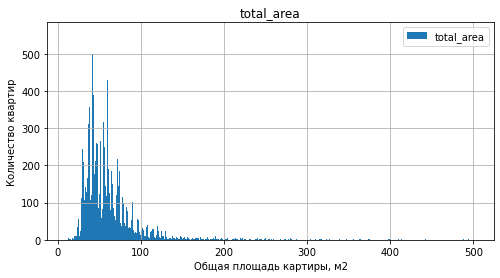

In [32]:
# строим гистограмму по общим площадям квартир, в диапазоне от 12(минимальная площадь) до 500(пыталась построить на максимальную 900, но ее даже не видно на графике.)
data.plot(y = 'total_area', kind = 'hist', bins = 1000, grid=True, figsize = (8, 4), range = (12,500))
plt.title('total_area')
plt.xlabel('Общая площадь картиры, м2')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Площадь квартиры')

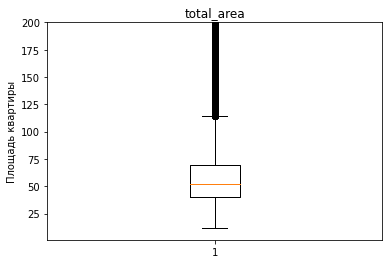

In [33]:
# смотрим на выбросы через боксплот в диапазоне до 200 метров(исходя из результатов гистограммы)
plt.boxplot(data['total_area'])
plt.title('total_area')
plt.ylim(1,200)
plt.ylabel('Площадь квартиры')

По боксплоту видно, что выбросы начинаются где-то на отметке 120. Возьмем для надежности 125м2.

In [34]:
# делаем срез по площади больше 125 метров
flat_over_125 = data.query('total_area >125')

# считаем сколько это в процентах от всех квартир и округляем методом "round"
persent = round(len(flat_over_125['total_area']) / len(data) * 100, 2)

display('Квартир больше 125м2 - {0}%'.format(persent))

'Квартир больше 125м2 - 3.97%'

Общая площадь в продаваемых квартирах в среднем 60 метров, медианное значение сильно отличается -52 метра. Разницу между этими значениями можно объяснить квартирами с подозрительно большой площадью - на графике видны квартиры и по 200-400 метров. Диаграма размаха подсказывет, что стоит ограничиться исследованием квартир с площадью до 125 метров. В дальнейшее исследование не попадут всего 4% квартир. Минимальную площадь оставим 12м2.

Изучим цены:

In [35]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0, 0.5, 'Количество квартир')

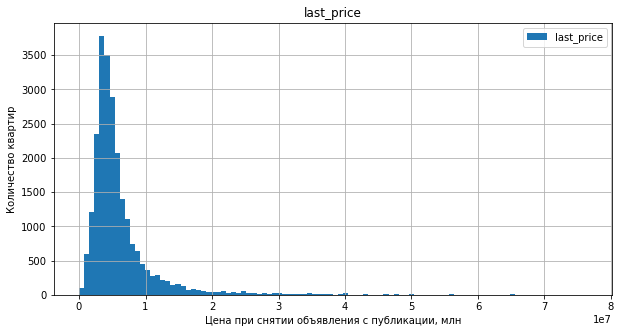

In [36]:
# строим гистограмму по цене квартир, в диапазоне от 1,219 млн(минимальная площадь) до 76,3 млн(максимальная)
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(10,5), range=(1219, 76300000))
plt.title('last_price')
plt.xlabel('Цена при снятии объявления с публикации, млн')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Цена при снятии объявления с публикации, млн')

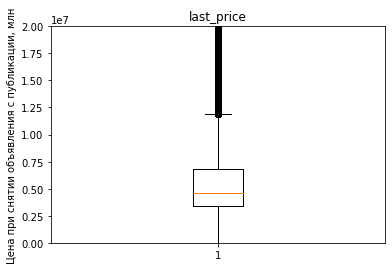

In [37]:
# смотрим на выбросы через боксплот в диапазоне до 20 млн(исходя из результатов гистограммы)
plt.boxplot(data['last_price'])
plt.title('last_price')
plt.ylim(0,20000000)
plt.ylabel('Цена при снятии объявления с публикации, млн')

In [38]:
# делаем срез по цене до  12.5млн
flat_over_price = data.query('last_price > 12500000')

# считаем сколько это в процентах от всех квартир и округляем методом "round"
persent = round(len(flat_over_price) / len(data )* 100, 2)

display('Квартир дороже 12,5 млн - {0}%'.format(persent))

'Квартир дороже 12,5 млн - 7.66%'

При минимальной цене на недвижимость в 1,2 млн, среднее значение составляет в 6,5 млн руб., медиана 4,6 млн руб. Ничего необычного, нормальное распределение. По боксплоту видно, что ус заканчивается на отметке чуть ниже  12,5 млн. нормальными будем считать цены от минимальной  и до 12,5 млн.

Теперь количество комнат:

In [39]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Количество квартир')

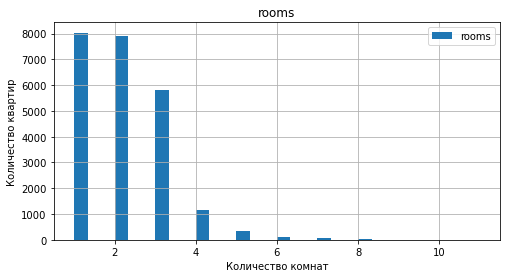

In [40]:
data.plot(y = 'rooms', bins=30, kind = 'hist',  grid=True, range = (1, 11), figsize = (8,4))
plt.title('rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Чаще всего встречаюся объявления о продаже одно- и двух-комнатных квартир, немного реже трёшки. Это вполне ожидаемо для современных российских городов с типовой застройкой.

Смотрим на высоту потолков.

In [41]:
data['ceiling_height'].describe()

count    23649.000000
mean         2.722502
std          0.990669
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество квартир')

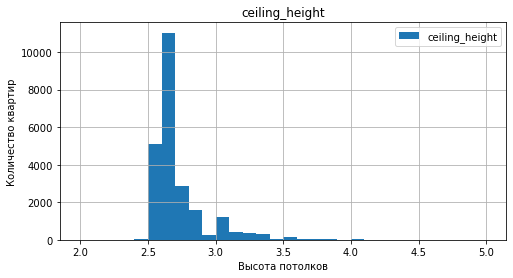

In [42]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (8,4))
plt.title('ceiling_height')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')

In [43]:
# делаем срез по высоте потолков ниже 2,5 метров и выше 3,5 метров
flat_ceiling = data.query('2.5 <= ceiling_height > 3.5')

# считаем сколько это в процентах от всех квартир и округляем методом "round"
persent = round(len(flat_ceiling) / len(data)* 100, 2)

display('Квартир с потолками ниже 2.5 и выше 3.5 метров - {0}%'.format(persent))

'Квартир с потолками ниже 2.5 и выше 3.5 метров - 1.28%'

При построении гистограммы сознательно проигнорировали минимальное и максимальное значения, как явно ошибочные. График построен в границах от 2 до 5 метров. Сделан расчет сколько потеряем, если отбросим заведомо неадекватные высоты потолков от 2,5 до 3,5 метров- всего 1%. Высота потолков в среднем составляет 2,72 м, медиана 2,64 м. Нормальныой будем считать высоту потолков от 2,5 до 3,5 метров.

### Время продажи квартир

Смотрим сколько дней объявление было опубликовано. Построим гистограмму, посчитаем среднее и медиану. 

In [44]:
data['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Получили очень большую разницу между медианой (73 дня) и средним (156 дней), при максимальном количестве в 1580 дней(больше 4х лет О_о). Что-то тут не чисто.
Построим гистограмму и диаграмму размаха. Берем значения от 1 дня до максимального.

Text(0, 0.5, 'Количество квартир')

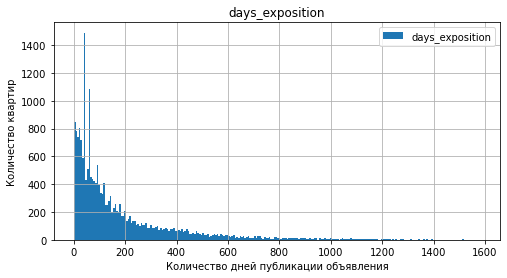

In [45]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 250, range = (1,1580), grid=True, figsize = (8,4))
plt.title('days_exposition')
plt.xlabel('Количество дней публикации объявления')
plt.ylabel('Количество квартир')

Есть большие выбросы. Укрупним график. Посмотрим в границах от 1 до 200 дней(75квариль):

Text(0, 0.5, 'Количество квартир')

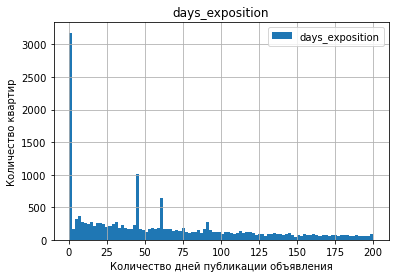

In [46]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (0,200))
plt.title('days_exposition')
plt.xlabel('Количество дней публикации объявления')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество дней публикации объявления')

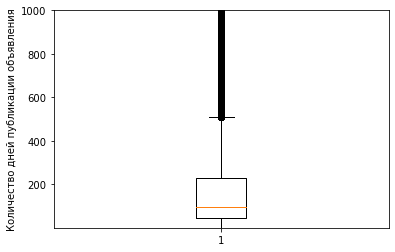

In [47]:
# диаграмму размаха нарисуем в границах от 1 до 1000 
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)
plt.ylabel('Количество дней публикации объявления')

In [48]:
# смотрим первую десятку самых частых дней размещения
data['days_exposition'].value_counts().head(10)

0     3180
45     879
60     538
7      234
30     208
90     203
4      174
3      158
5      152
14     148
Name: days_exposition, dtype: int64

Подозрительно ровные цифры 7,30,45,60,90. Скорее всего речь идет об ограничениях на срок размещения объявления, а значит не факт, что квартиры были проданы. Возможен вариант, что квартира всё же продана, но объявление  не было снято и провисело до конца срока. В общем напрашивается метрика по какой причине снимается объявление. Сейчас этого в данных нет, а было бы очень полезно.

В случае с 0 - это наши пропущенные значения и их 3180, что наверняка сильно искажает картину. Пересчитаем среднее и медиану без нулевых значений:

In [49]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

На текущий момент получили среднее значение - 180 дней, а медиану - 95 дней, межквартильный размах - от 45 до 231 дня. Диаграмма размаха рисуется от минимального значения до, примерно, 500 дней. Необоснованно долгими будем считать- от 500 дней и выше.  

### Убираем аномалии из данных

 Запишем в переменную "good_data" новый датафрейм без аномальных значений и построим заново графики. Убираем из данных:
 - количество дней продаж равные 7, 30, 45, 60 и 90 дням,
 - высота потолков от 2,5 до 3,5 метра
 - общая площадь до 125 метров
 - количество комнат от 1 до 6
 - цена  до 12,5 млн

In [50]:
# делаем последовательно срез без аномальных значений 

# по цене
good_data_price = data.query('last_price <= 12500000')
#по дням продажи
good_data_days = good_data_price.query(" (days_exposition != 7) & (days_exposition != 30) & (days_exposition != 45) & (days_exposition != 60) & (days_exposition != 90)")

# по высоте потолков
good_data_ceiling = good_data_days.query('ceiling_height >= 2.50 & ceiling_height <= 3.50')
# общей площади
good_data_area = good_data_ceiling.query('total_area <= 125.0')
# количеству комнат
good_data = good_data_area.query('rooms <= 6')

# считаем сколько это в процентах от всех квартир и округляем методом "round"
persent = round(len(good_data) / len(data)*100, 2)
display('Осталось квартир {0} - {1}%'.format(len(good_data), persent))

'Осталось квартир 19569 - 82.74%'

После избавления от аномалий у нас осталось 83% данных, но все же объявлений почти 20 тысяч - есть с чем работать. И, что более важно, эти данные чистые. Теперь нужно пересчитать показатели заново.

In [51]:
#считаем количество дней публикации
good_data[good_data['days_exposition']!=0]['days_exposition'].describe()

count    16940.000000
mean       187.249941
std        218.105569
min          1.000000
25%         43.000000
50%        109.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество дней публикации объявления')

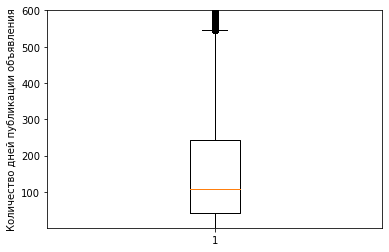

In [52]:
#диаграмма размаха
plt.boxplot(good_data[good_data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,600)
plt.ylabel('Количество дней публикации объявления')

Text(0, 0.5, 'Количество квартир')

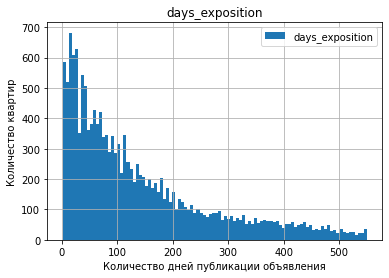

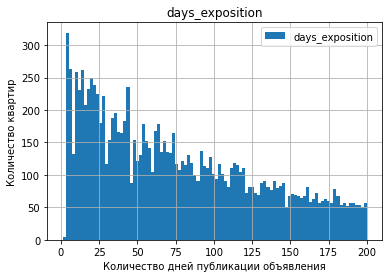

In [53]:
#гистограммы до 550 и до 200 дней
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,550))
plt.title('days_exposition')
plt.xlabel('Количество дней публикации объявления')
plt.ylabel('Количество квартир')

good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
plt.title('days_exposition')
plt.xlabel('Количество дней публикации объявления')
plt.ylabel('Количество квартир')

В очищенных данных получили значения медианы и среднего значения - 109 и 187 дня соответственно, вместо 95 и 180.  Судя по боксплоту, теперь значения располагаются от 1 до 550 дней. Межквартильный размах от 43 до 244 дней.

**Факторы влияющие на стоимость квартиры**

Посмотрим зависимость цены квадратного метра от общей площади квартиры. Соберем сводную таблицу, построим диаграмму рассеяния, посчитаем кореляцию.

Text(0, 0.5, 'Цена за квадратный метр')

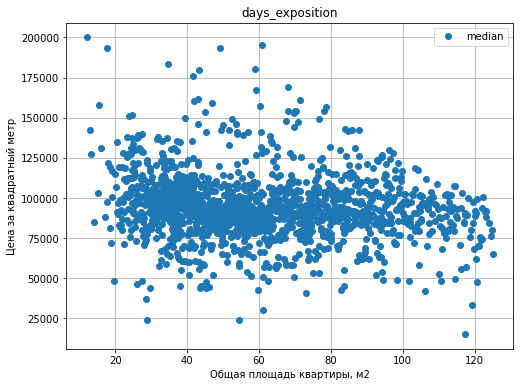

In [54]:
pivot_table_total_area = (good_data.pivot_table(index = 'total_area', 
                                           values = 'price_per_square_meter', 
                                           aggfunc = ['mean', 'count', 'median'])
                         )
pivot_table_total_area.columns = ['mean', 'count', 'median']

# строим диаграмму рассеяния по медианному значению цены за метр из сводной таблицы
pivot_table_total_area.plot(y = 'median', grid=True,  figsize=(8, 6), style = 'o')
plt.title('days_exposition')
plt.xlabel('Общая площадь квартиры, м2')
plt.ylabel('Цена за квадратный метр')

In [55]:
# посмотрим корреляцию общей площади к цене за метр
good_data['total_area'].corr(good_data['price_per_square_meter'])

-0.06309264305870926

Небольшое отрицательное значение корреляции. При этом диаграмма рассеяния наглядно показывает как с увеличением площади квартиры цены за метр начинают сильно разниться. Для квартир  с площадью до 60 метров, график имеет большую плотность, но, тем не менее, и дисперсия имеет широкий разброс. У квартир более 40 метров разброс цен становится еще больше,а самих квартир с такой площадью меньше.  Делаем вывод, что зависимость может быть при небольшой, стандартной площади квартир, но чем больше площадь, тем меньше зависимость.

Изучим зависимость цены квадратного метра от числа комнат. По анологии с  общей площадью построим сводную таблицу, сортируем по медиане цены за квадрат.

In [56]:
pivot_table_rooms = (good_data.pivot_table(index = 'rooms', 
                                      values = 'price_per_square_meter', 
                                      aggfunc = ['mean', 'count', 'median'])
                    )
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.sort_values('median', ascending = False)

,mean,count,median
rooms,,,
0,108720.658683,167,105555.0
1,100192.515004,7198,100000.0
2,91293.928530,6856,91918.5
6,89134.777778,9,88383.0
3,84556.476556,4564,85707.0
4,81593.865300,683,82269.0
5,77403.532609,92,80066.5


Text(0, 0.5, 'Цена за квадратный метр')

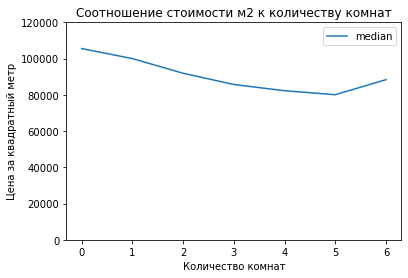

In [57]:
pivot_table_rooms.plot(y = 'median')
plt.ylim([0, 120000])
plt.title('Соотношение стоимости м2 к количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за квадратный метр')

In [58]:
good_data['rooms'].corr(good_data['price_per_square_meter'])

-0.2211318701152906

На графике видно, как стоимость квадратного метра сильно снижается  от 1 до 5 комнат, потом начинается рост цен. Возможно дело в том, что на рынке просто гораздо больше объявлений для 1-3 комнатных квартир. Здесь  важна и общая площадь квартиры. Бывают просторные 2-ки, размером с 3х-комнатные. Рост же после отметки в 4 комнаты скорее говорит о каких то дорогих квартирах с нестандартной планировкой и большой площадью (потому и комнат больше). Незначительная отрицательная корреляция -22%  подтверждает, что есть обратная зависимость, чем больше комнат, тем ниже цена за м2.

Изучим зависимость цены квадратного метра от этажа (первого или последнего). Действия те же.

Text(0, 0.5, 'Цена за квадратный метр')

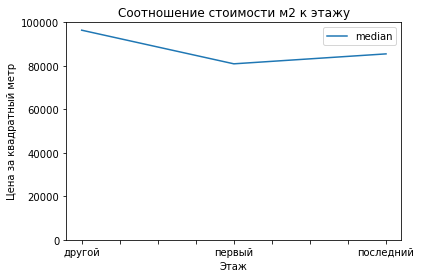

In [59]:
pivot_table_floor_category = (good_data.pivot_table(index = 'floor_category',
                                               values = 'price_per_square_meter',
                                               aggfunc = ['mean', 'count', 'median'])
                                              )
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
plt.ylim([0, 100000])
plt.title('Соотношение стоимости м2 к этажу')
plt.xlabel('Этаж')
plt.ylabel('Цена за квадратный метр')

Вполне ожидаемо самые дешевые квартиры на первых этажах, последние, впрочем, тоже не особо любят. Выше ценятся квартиры не на первом и не на последнем этаже.

Изучим зависимость цены квадратного метра от удалённости от центра. 

Text(0, 0.5, 'Цена за квадратный метр')

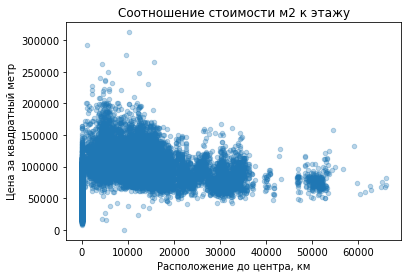

In [60]:
good_data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)
plt.title('Соотношение стоимости м2 к этажу')
plt.xlabel('Расположение до центра, км')
plt.ylabel('Цена за квадратный метр')

In [61]:
good_data['cityCenters_nearest'].corr(good_data['price_per_square_meter'])

0.18107032077405102

Корреляция незначительная - 18%. На графике видим большое количество обявлений от 0 до 38 км. Чем ближе к центру, тем больше дисперсия. На расстоянии от 0 до 20 км цены сильно разнятся, дальше разброс цен становится меньше, но все еще может достигать разницы в 100 тысяч за квадрат. Делаем вывод, что расположение может оказывать влияние на конечную стоимость квартиры, но как один из множества факторов.
    
Изучим зависимость цены квадратного метра от даты размещения: дня недели, месяца, года.

Text(0, 0.5, 'Цена за квадратный метр')

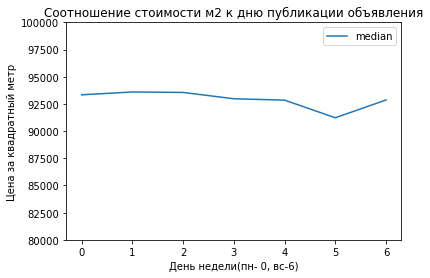

In [62]:
# сводная таблица по дням недели(0-понедельник, 6- воскресенье)
pivot_table_weekday_exposition = (good_data.pivot_table(index = 'weekday_exposition', 
                                                   values = 'price_per_square_meter', 
                                                   aggfunc = ['mean', 'count', 'median']))
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']

pivot_table_weekday_exposition.plot(y = 'median')
plt.ylim([80000, 100000])
plt.title('Соотношение стоимости м2 к дню публикации объявления')
plt.xlabel('День недели(пн- 0, вс-6)')
plt.ylabel('Цена за квадратный метр')


In [63]:
pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
weekday_exposition,,,
1,93328.208405,3474,93594.5
2,93256.769584,3268,93551.5
0,92983.583026,2981,93333.0
3,92513.064278,3516,92969.5
6,92618.117690,1385,92857.0
4,92585.958121,3343,92844.0
5,90876.834582,1602,91222.0


Судя по графику объявления опубликованные в субботу дешевле других. Впрочем, логика подсказывает, что это лишь совпдадение.  Основная часть объявлений находятся в активном статусе гораздо больше недели. Здесь лучше смотреть в разрезе месяца публикации.

Text(0, 0.5, 'Цена за квадратный метр')

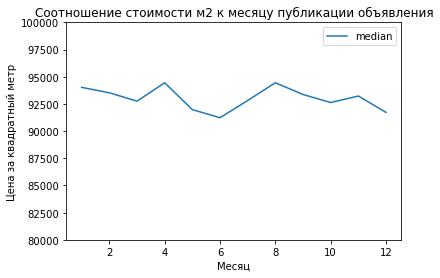

In [64]:
# своная таблица по месяцам
pivot_table_month_exposition = good_data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']

pivot_table_month_exposition.plot(y = 'median')
plt.ylim([80000, 100000])
plt.title('Соотношение стоимости м2 к месяцу публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена за квадратный метр')

In [65]:
# сортируем цены по месяцам за м2 по убыванию
pivot_table_month_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,93940.833009,2054,94444.0
8,93872.054280,1437,94444.0
1,93419.920942,1189,94023.0
2,92545.227866,2146,93523.5
9,93436.678877,1638,93367.0
11,92693.618348,1973,93225.0
7,92443.787923,1358,92814.0
3,92545.373321,2159,92753.0
10,92462.255801,1810,92625.5


Здесь неплохо прослеживается сезонность. Самые низкие цены летом и в конце года, в августе и апреле по самой высокой цене. 

Text(0, 0.5, 'Цена за квадратный метр')

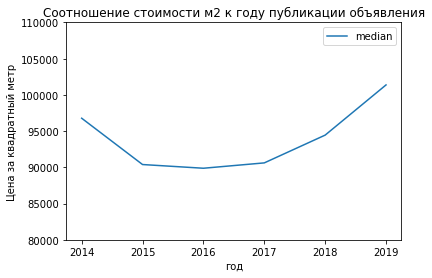

In [66]:
# своная таблица по годам
pivot_table_year_exposition = good_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']

pivot_table_year_exposition.plot(y = 'median')
plt.ylim([80000, 110000])
plt.title('Соотношение стоимости м2 к году публикации объявления')
plt.xlabel('год')
plt.ylabel('Цена за квадратный метр')

In [67]:
x= pivot_table_year_exposition.reset_index().sort_values('median', ascending = False)
x

,year_exposition,mean,count,median
5,2019,99485.794309,2460,101369
0,2014,96062.362637,91,96774
4,2018,93435.685852,6863,94444
3,2017,90780.857122,6803,90611
1,2015,91303.276488,991,90384
2,2016,89805.758153,2361,89873


In [68]:
# ищем разницу  между ценами 2014 и 2016 года
x.loc[0,'median'] - x.loc[2,'median']

6901

С 2014 до 2016 года цены снизились на 6901 за квадрат. Связано это, скорее всего, с внешней политикой, упавшими ценами на нефть и последующим финановым кризисом, как итог - снижение спроса. К 2018 цены восстановились почти до уровня 2014, а в 2019 показали сильный рост.

В общем можно сказать, что цены определенно зависят от даты размещения объявления. В большей степени от месяца и года.


###  Топ 10 населенных пунктов по количеству объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [69]:
# сводная таблица по числу объявлений в населенных пунктах. Топ 10
locality_pivot_table = good_data.pivot_table(index = 'good_locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values(['count', 'mean'], ascending = False).head(10)
locality_pivot_table

,count,mean
good_locality_name,,
Санкт-Петербург,12624,105941.623812
Мурино,540,85948.757407
Кудрово,420,94930.552381
Шушары,390,78918.866667
Всеволожск,360,67082.086111
Пушкин,310,101213.932258
Колпино,299,75539.765886
Парголово,284,90736.334507
Гатчина,274,68275.901460


Из 10 населённых пунктов самая высокая стоимость жилья в Санкт-Петербурге - 106 тысяч за м2, а самая низкая стоимость в Выборге - 58 тысяч за м2.

###  Особенности квартир в  центре Санкт-Петербурга

Выясним, какая область входит в центр города. Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Создадим столбец с расстоянием до центра в километрах, после этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центр города.

In [70]:
#отбираем Петербург    
city_center_price = good_data[good_data['locality_name'] == 'Санкт-Петербург']
#создаем столбец с  переводом в километры и переводим в инт
city_center_price.loc[:, 'distance_to_cityCenters'] = (city_center_price.loc[:, 'cityCenters_nearest'] / 1000).astype(int).copy()

C:\Users\Jane\AppData\Local\Temp\ipykernel_208\1105087824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_center_price.loc[:, 'distance_to_cityCenters'] = (city_center_price.loc[:, 'cityCenters_nearest'] / 1000).astype(int).copy()


Text(0, 0.5, 'Цена за квадратный метр')

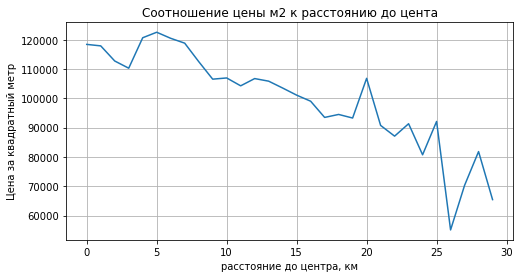

In [71]:
#Группипуем данные по средней цене квадратного метра и строим график
city_center_price_grouped = city_center_price.groupby(['distance_to_cityCenters'])['price_per_square_meter'].mean().astype(int)

city_center_price_grouped.plot(x='distance_to_cityCenters', y='price_per_square_meter', figsize=(8,4), grid = True)
plt.title('Соотношение цены м2 к расстоянию до цента')
plt.xlabel('расстояние до центра, км')
plt.ylabel('Цена за квадратный метр')

На графике видим  первое резкое снижение на отметке в 3 км, но потом видим пик цен на 5 км. Затем начинается снижене в радиусе  до 8-10 км. Центром считать будем все же  радиус в 10 километров.


Выделим сегмент квартир в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Изучим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Посмотрим, отличаются ли они от общих выводов по всему городу?

,mean,count,median
rooms,,,
0,137288.700000,20,130200.5
1,128644.625778,1125,124659.0
2,114832.131698,1549,110925.0
3,103117.055659,1078,99742.0
6,92692.714286,7,95454.0
4,93038.653992,263,92105.0
5,90499.489362,47,90456.0


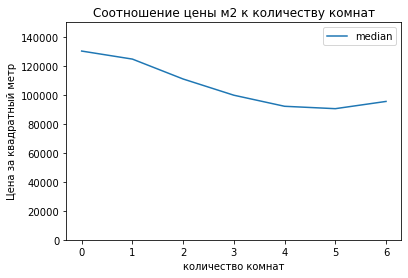

In [72]:
# сегментируем квартиры в центре Питера, радиус 10 км
center_spb_data = city_center_price.query('distance_to_cityCenters <= 10 and locality_name == "Санкт-Петербург"')

#Строим сводную таблицу зависимости стоимости квадратного метра от количества комнат.
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']

center_spb_rooms.plot(y = 'median')
plt.ylim([0, 150000])
plt.title('Соотношение цены м2 к количеству комнат')
plt.xlabel('количество комнат')
plt.ylabel('Цена за квадратный метр')

center_spb_rooms.sort_values('median', ascending = False)

In [73]:
# корреляция
center_spb_data['rooms'].corr(center_spb_data['price_per_square_meter'])

-0.4060861419822137

В центре Питера, ситуация схожа с остальными объявлениями. Корреляция также отрицательная, но возрастает до 40%. Для центра города зависимость чем больше комнат, тем ниже цена за квадрат проявляется сильнее. Впрочем, здесь тоже стоит учитывать общую площадь квартры.

,mean,count,median
floor_category,,,
другой,116415.338081,2949,111868
первый,103597.099812,531,100000
последний,110933.883415,609,105000


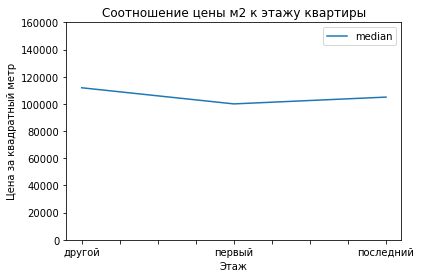

In [74]:
# Зависимость стоимости квадратного метра от этажа

center_spb_floor_category = center_spb_data.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']

center_spb_floor_category.plot(y = 'median')
plt.ylim([0, 160000])
plt.title('Соотношение цены м2 к этажу квартиры')
plt.xlabel('Этаж')
plt.ylabel('Цена за квадратный метр')

center_spb_floor_category

Картина для Питера такая же как и по остальным обявлениям. Квартиры на первом этаже  дешевле, чем на последнем, люди предпочитают другие этажи.

-0.14624040493966836

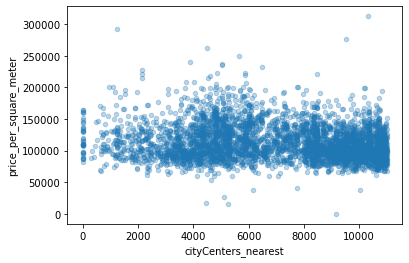

In [75]:
# Зависимость стоимости квадратного метра от удаленности от центра.

center_spb_data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_per_square_meter'])

У нас уже выбраны квартиры в центре, поэтому и зависимость прослеживается хуже, однако и здесь заметен пик цен в районе 5 км.

Text(0, 0.5, 'Цена за квадратный метр')

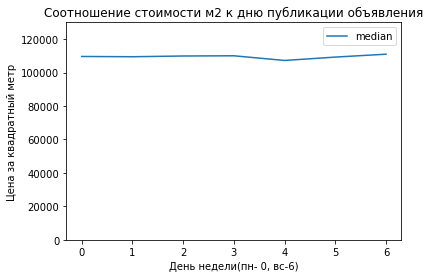

In [76]:
#Зависимость стоимости квадратного метра от дня недели размещения объявления.

center_spb_weekday_exposition = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)
plt.ylim([0, 130000])
plt.title('Соотношение стоимости м2 к дню публикации объявления')
plt.xlabel('День недели(пн- 0, вс-6)')
plt.ylabel('Цена за квадратный метр')

Здесь картина ожидаемая. Зависимости цены от дня недели, в которую опубликовано объявление, не прослеживается.

,mean,count,median
month_exposition,,,
9,116049.053672,354,112728.5
3,115986.440000,450,112540.5
1,116220.741803,244,110801.0
8,115222.033898,295,110344.0
4,115686.104167,432,110186.0
10,112643.548476,361,108653.0
12,113715.103321,271,108333.0
6,110829.539157,332,107737.0
7,112023.044218,294,107362.0


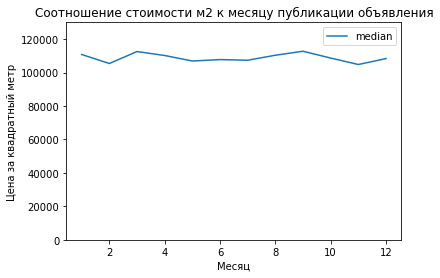

In [77]:
#Зависимость стоимости квадратного метра от месяца размещения объявления.

center_spb_month_exposition = center_spb_data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']

center_spb_month_exposition.plot(y = 'median')
plt.ylim([0, 130000])
plt.title('Соотношение стоимости м2 к месяцу публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена за квадратный метр')

center_spb_month_exposition.sort_values('median', ascending = False)

Есть провал в феврале и ноябре. С марта цены снижаются,в летние месяцы затишье, как и в целом по рынку, но пик приходится на сентябрь. И, если летом это ожидаемая ситуация, то в остальном не понятно.

,mean,count,median
year_exposition,,,
2019,121757.061630,503,118750
2018,115734.311708,1341,111368
2017,111719.592029,1380,105882
2015,110237.826667,300,105314
2016,109863.992523,535,104603


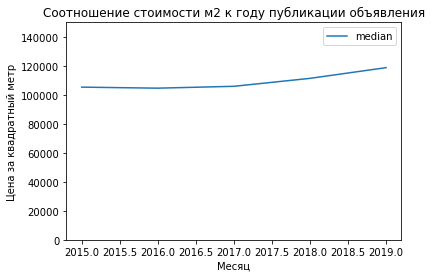

In [78]:
#Зависимость стоимости квадратного метра от года размещения объявления.

center_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']

center_spb_year_exposition.query('count > 50').plot(y = 'median')
plt.ylim([0, 150000])
plt.title('Соотношение стоимости м2 к году публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена за квадратный метр')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

В отличие от всей выборки цены в центре Питера непрерывно растут, кризис не сказался.

## Общий вывод

На предварительном этапе обработки нашли множество пропущенных значений и неверный тип данных. Там, где это было целесообразно, пропущенные значения заменили, тип данных привели к нужному. Возможно большое количество пропущенных значений связано с тем, что дополнительные характеристики (расстояние до парков, водоемов, аппартаменты,студии) появились не сразу, но возможно  также, что данные выгружены не корректно. Часть пропущенных значений (площадь кухни, общее количество этажей в доме) скорее всего были не обязательными полями для заполнения. Названия населенных пунктов имели множество неявных дубликатов, т.к., очевидно, люди заполняли названия вручную. Необходимо стандартизировать ввод даных и сделать ограничения по вводу цифровых показателей. Например по высоте потолков нельзя вводить значение меньше  2,5 и больше, скажем, 5 метров.  Считаю что стоит передать эту информацию разработчикам.

Посчитали и добавили в таблицу цену квадратного метра жилья, из колонки с датой размещения высчитали дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 

Изучили данные на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков, продолжительность размещения объявления. Нашли аномалии по высоте потолков, площади квартир. В датах размещения нашли выбивающиеся значения в определенные сроки(7,30, 45, 60,90). Пришли к выводу что это дты автоматического снятия объявлений с публикации. Очистили данные от выбросов. На будущее, хорошо было бы добавить колонку, которая отображает причину снятия объявления с продажи (продана/ снята с публикации) потому как в эти дни объявления могли снимать по обеим причинам и вместе с выбросами мы неизбежно удалили часть по настоящему проданных квартир.

 Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют общая площадь, количество комнат(1-2), этаж квартиры (не первый, не последний), близость к центру, год размещения. По году получилось, что в связи с кризисом в 2014 году резко снизились цены на недвижимость везде, кроме Санкт- Петербурга. Там цены только растут.

